In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

In [2]:
import pandas as pd
import glob

# set paths to folders containing CSV files
path = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/"

# combine data_po files into df1
files_po = glob.glob(path + "*data_po*.csv")
df1 = pd.DataFrame()
for file in files_po:
    with open(file, 'r') as f:
        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df1 = pd.concat([df1, temp_df], axis=0)

# rename the columns in df1 and convert to float
df1.columns = [i for i in range(df1.shape[1])]
df1 = df1.rename(columns={0: 'Fault'})
df1 = df1.astype(float)

# combine data_pdmp files into df2
files_pdmp = glob.glob(path + "*data_pdmp*.csv")
df2 = pd.DataFrame()
for file in files_pdmp:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df2 = pd.concat([df2, temp_df], axis=0)

# rename the columns in df2 and convert to float
df2.columns = [i for i in range(df2.shape[1])]
df2 = df2.rename(columns={0: 'Fault'})
df2 = df2.astype(float)

# combine data_pin files into df3
files_pin = glob.glob(path + "*data_pin*.csv")
df3 = pd.DataFrame()
for file in files_pin:
    with open(file, 'r') as f:

        csv_string = f.read()

        data = csv_string
        df = pd.DataFrame([x.split(',') for x in data.split('\n')])
        df.drop(df.tail(1).index,inplace=True)

        temp_df = df.iloc[:, :500]
        df3 = pd.concat([df3, temp_df], axis=0)

# rename the columns in df3 and convert to float
df3.columns = [i for i in range(df3.shape[1])]
df3 = df3.rename(columns={0: 'Fault'})
df3 = df3.astype(float)


In [3]:
# # set paths to folders containing CSV files
# path1 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_po1.csv"
# path2 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pdmp1.csv"
# path3 = "../Data_Challenge_PHM2022_training_data/Data_Challenge_PHM2022_training_data/data_pin1.csv"

# all_files = [path1, path2, path3]
# dfs = []

# for filename in all_files:
#     with open(filename, 'r') as f:
#         csv_string = f.read()

#     data = csv_string
#     df = pd.DataFrame([x.split(',') for x in data.split('\n')])
#     df.drop(df.tail(1).index,inplace=True)
#     dfs.append(df)

# df_combined1, df_combined2, df_combined3 = dfs[0], dfs[1], dfs[2]

# # process dataframe 1
# df1 = df_combined1.rename(columns={0: 'Fault'})
# df1 = df1.astype(float)

# mincol1 = df1.count(axis=1)
# min_elements1 = mincol1.min()
# df1 = df1.iloc[:, :min_elements1]

# # process dataframe 2
# df2 = df_combined2.rename(columns={0: 'Fault'})
# df2 = df2.astype(float)

# mincol2 = df2.count(axis=1)
# min_elements2 = mincol2.min()
# df2 = df2.iloc[:, :min_elements2]

# # process dataframe 3
# df3 = df_combined3.rename(columns={0: 'Fault'})
# df3 = df3.astype(float)

# mincol3 = df3.count(axis=1)
# min_elements3 = mincol3.min()
# df3 = df3.iloc[:, :min_elements3]

In [4]:
# Assign Fault label to new df y_true

y_true1 = df1["Fault"]
y_true2 = df2["Fault"]
y_true3 = df3["Fault"]

In [5]:
# del fault label column 

df1.columns = df1.columns.astype(str)
del df1[df1.columns[0]]

df2.columns = df2.columns.astype(str)
del df2[df2.columns[0]]

df3.columns = df3.columns.astype(str)
del df3[df3.columns[0]]

In [6]:
# Perform PCA on the data

pca1 = PCA(n_components=2)
principal_components1 = pca1.fit_transform(df1)

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(df2)

pca3 = PCA(n_components=2)
principal_components3 = pca3.fit_transform(df3)

In [7]:
# Create a DataFrame df_pca with the principal components and cluster labels

df_pca1 = pd.DataFrame(data=principal_components1, columns=['PC1', 'PC2'], index=df1.index)

df_pca2 = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2'], index=df2.index)

df_pca3 = pd.DataFrame(data=principal_components3, columns=['PC1', 'PC2'], index=df3.index)

c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python\Python 3.9.13\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


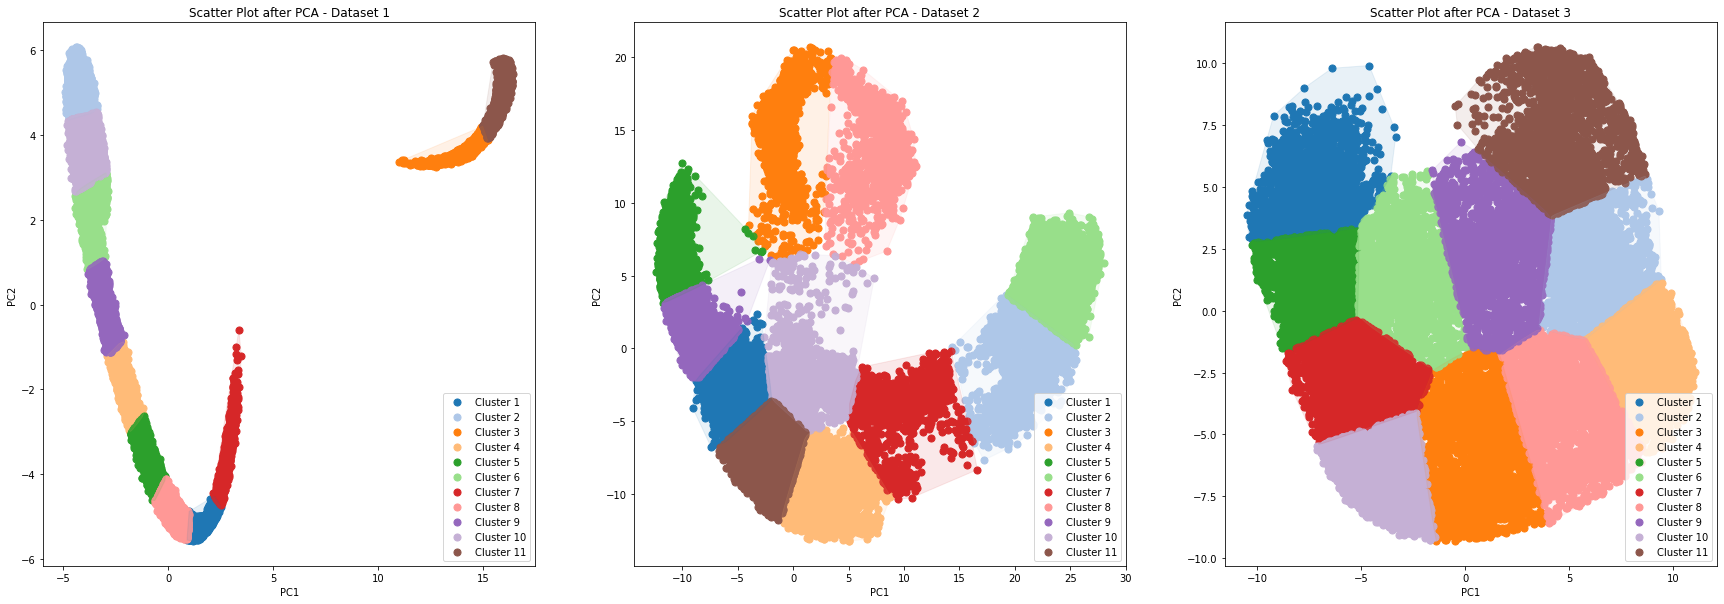

In [16]:
def plot_clusters(df_list, num_clusters=11):
    # Create a list of unique colors for each cluster
    colors = sns.color_palette('tab20', num_clusters)

    fig, axs = plt.subplots(1, len(df_list), figsize=(10*len(df_list), 10))

    # Create a separate scatter plot for each dataframe
    for j, df in enumerate(df_list):
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(df[['PC1', 'PC2']])
        df['cluster'] = kmeans.labels_
        ax = axs[j]
        for i in range(num_clusters):
            ax.scatter(df.loc[df['cluster']==i, 'PC1'], df.loc[df['cluster']==i, 'PC2'], color=colors[i], s=50, label=f'Cluster {i+1}')
            ax.set_title(f'Scatter Plot after PCA - Dataset {j+1}')
            ax.set_xlabel('PC1')
            ax.set_ylabel('PC2')
            ax.legend(loc='lower right')

        # Draw convex hulls
        for i in range(num_clusters):
            cluster_points = df.loc[df['cluster']==i, ['PC1', 'PC2']]
            hull = ConvexHull(cluster_points)
            ax.fill(cluster_points.iloc[hull.vertices, 0], cluster_points.iloc[hull.vertices, 1], color=colors[i], alpha=0.1)

    plt.show()

# Example usage with three dataframes df1, df2, df3:
plot_clusters([df_pca1, df_pca2, df_pca3], num_clusters=11)

In [9]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true1, df_pca1["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1     2    3    4     5    6    7     8    9    10
Fault                                                            
1.0      152  294     0  251  356   567  230  471     0  246  456
2.0        0    0  2353    0    0     0    0    0  1139    0    0
3.0        7  506     0  353  336   899  300  143     0  261  265
4.0      534  257     0  219  206   298  235  782     0  273  297
5.0       78  316     0  254  397   869  148  372     0  175  465
6.0        0  658     0  149   78  1077  263    1     0  790   42
7.0      480  265     0  234  301    18  340  836     0  231  449
8.0      413  283     0  330  367   293  248  655     0  196  334
9.0      135  222     0  216  278   835  246  489     0  223  413
10.0     251  355     0  223  192   301  237  531     0  323  278
11.0     248  348     0  189  211   613  232  692     0  216  457


In [18]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true1, df_pca1["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.1892393071601129


In [10]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true2, df_pca2["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2     3     4    5    6    7     8     9    10
Fault                                                             
1.0        0  341  696     0     0  619  715    0     0     0  652
2.0        0    6    0     0  2162    0    0   93     0  1229    2
3.0      130  470  525     0     0  636  657   65     0     0  587
4.0      223    0    2   305     0    0  521  875  1040     0  135
5.0        0  335  783     0     0  516  811    0     0     0  629
6.0        0    0    0  2211     0    0    0    0   847     0    0
7.0        1  948  526     0     0  449  639    2     0     0  589
8.0       78  938  610     0     0  689  284    4     0     0  516
9.0      872  206   96     0     0    0  588  678     0     0  617
10.0       0  347  580     0     0  512  748    3     0     0  501
11.0       0  544  655     0     0  535  870    1     0     0  601


In [19]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true2, df_pca2["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.3584602144889683


In [11]:
# create a crosstab of true labels and cluster assignments
label_cluster_map = pd.crosstab(y_true3, df_pca3["cluster"])

# print the mapping
print(label_cluster_map)

#This will display a heatmap where each row represents a true label and each column represents a cluster.

cluster   0    1    2     3    4    5    6    7    8    9    10
Fault                                                          
1.0      202  280  369    50  264  368  186  281  329  354  340
2.0      437   70    0  1720    0  727  421    0    0    0  117
3.0      208  526  480    15  278  161  162  254  232  250  504
4.0      203  166  230   258  241  294  251  231  295  405  527
5.0      183  287  343    34  310  356  160  264  420  414  303
6.0       35  369  526     0  446  127   28  461  363  463  240
7.0      293  211  276   461  154  120  301  189  139  470  540
8.0      285  433  170   362  208   55  293  210  187  487  429
9.0      202  347  377   109  299  394  196  282  264  326  261
10.0     162  131  246   209  239  267  183  224  281  483  266
11.0     384  493  405   391  229  253  353  205   29  174  290


In [20]:
from sklearn.metrics import adjusted_mutual_info_score

# Calculate AMI
ami = adjusted_mutual_info_score(y_true3, df_pca3["cluster"])

# Print AMI
print("Adjusted Mutual Information:", ami)


Adjusted Mutual Information: 0.08037296153439813
